# Purpose : Analyze the Ad spending in the General Election of 2024

In [56]:
#importing utilities
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"

In [57]:
# creating dataframe
advertiser_df = pd.read_csv("advertisers.csv")
location_df = pd.read_csv("locations.csv")
result_df = pd.read_csv("results.csv")

In [58]:
# top 10 rows of advertisers dataframe
# it contains information about the advertising party, amount spend , page name etc.
advertiser_df.head(10)

,Page ID,Page name,Disclaimer,Amount spent (INR),Number of ads in Library
0,121439954563203,Bharatiya Janata Party (BJP),Bharatiya Janata Party (BJP),193854342,43455
1,351616078284404,Indian National Congress,Indian National Congress,108787100,846
2,132715103269897,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,73361399,1799
3,192856493908290,Ama Chinha Sankha Chinha,Ama Chinha Sankha Chinha,32294327,680
4,109470364774303,Ellorum Nammudan,Populus Empowerment Network Private Limited,22399499,879
5,1400615623488784,BJP Odisha,BJP Odisha,19573782,2152
6,109545244848137,Crafto,Kutumb App,16954562,272
7,574079826086251,Phir Ek Baar Modi Sarkar,phirekbaarmodisarkar.com,16358104,1928
8,218904931482352,All India Trinamool Congress,All India Trinamool Congress,15151000,336
9,775974615850063,MyGovIndia,MyGovIndia,14202725,67


In [59]:
# top 10 rows of location dataframe
# it contains the informations about the specific location and the amount spend in advertisement on that location
location_df.head(10)

,Location name,Amount spent (INR)
0,Andaman and Nicobar Islands,377858
1,Andhra Pradesh,100819732
2,Arunachal Pradesh,1385654
3,Assam,17478091
4,Bihar,53619242
5,Chandigarh,6507258
6,Chhattisgarh,14803286
7,Dadra and Nagar Haveli,584679
8,Delhi,42935946
9,Goa,2164209


In [60]:
 # contain result related informations
result_df.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase
0,1,1.0,Andaman & Nicobar Islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0
1,2,2.0,Arunachal Pradesh,Arunachal East,375310,83.31,312658,1.0
2,3,3.0,Arunachal Pradesh,Arunachal West,517384,73.60,380783,1.0
3,4,4.0,Assam,Dibrugarh,1659588,76.75,1273744,1.0
4,5,5.0,Assam,Jorhat,1727121,79.89,1379749,1.0


In [61]:
# remving whitespaces and turning state column in lowercase in result_df dataframe
result_df['State'] = result_df['State'].str.strip().str.lower()

In [62]:
# remving whitespaces and turning state column in lowercase in location_df dataframe
location_df['Location name'] = location_df['Location name'].str.strip().str.lower()

In [63]:
# merging result and location dataset using common columns to a new dataframe
merged_data = result_df.merge(
    location_df,
    left_on='State',
    right_on='Location name',
    how='left'
)

merged_data.head()

,_id,Sl No,State,PC_Name,Total Electors,Polled (%),Total Votes,Phase,Location name,Amount spent (INR)
0,1,1.0,andaman & nicobar islands,Andaman & Nicobar Islands,315148,64.10,202018,1.0,NaN,NaN
1,2,2.0,arunachal pradesh,Arunachal East,375310,83.31,312658,1.0,arunachal pradesh,1385654.0
2,3,3.0,arunachal pradesh,Arunachal West,517384,73.60,380783,1.0,arunachal pradesh,1385654.0
3,4,4.0,assam,Dibrugarh,1659588,76.75,1273744,1.0,assam,17478091.0
4,5,5.0,assam,Jorhat,1727121,79.89,1379749,1.0,assam,17478091.0


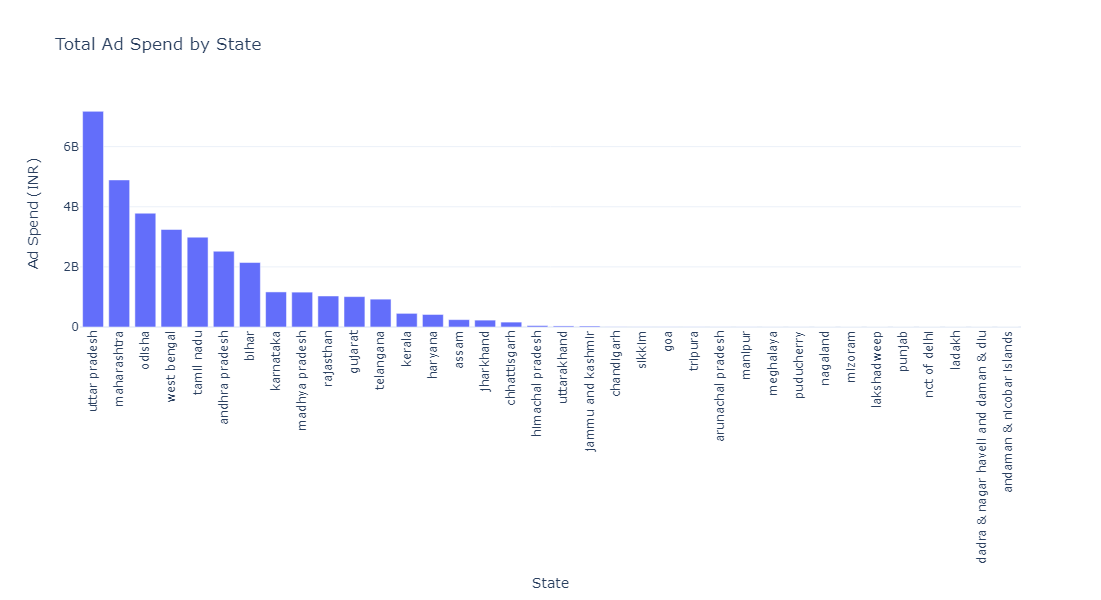

In [64]:
# Total ad spend by states
state_ad_spend = merged_data.groupby('State')['Amount spent (INR)'].sum().reset_index()

fig = px.bar(state_ad_spend, x='State', y='Amount spent (INR)',
             labels={'State': 'State', 'Amount spent (INR)': 'Ad Spend (INR)'},
             title='Total Ad Spend by State')

fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=800,
                  height=600)

fig.show()

# Analysis 

The data shows that Uttar Pradesh has the highest ad spend, followed by Maharashtra and Odisha. Other states with substantial ad expenditures include West Bengal, Tamil Nadu, Andhra Pradesh, and Bihar. This indicate that more populous states tend to invest more in ads, possibly due to their greater political significance and larger voter base.

In [65]:
state_voter_turnout = merged_data.groupby('State')['Polled (%)'].mean().reset_index()

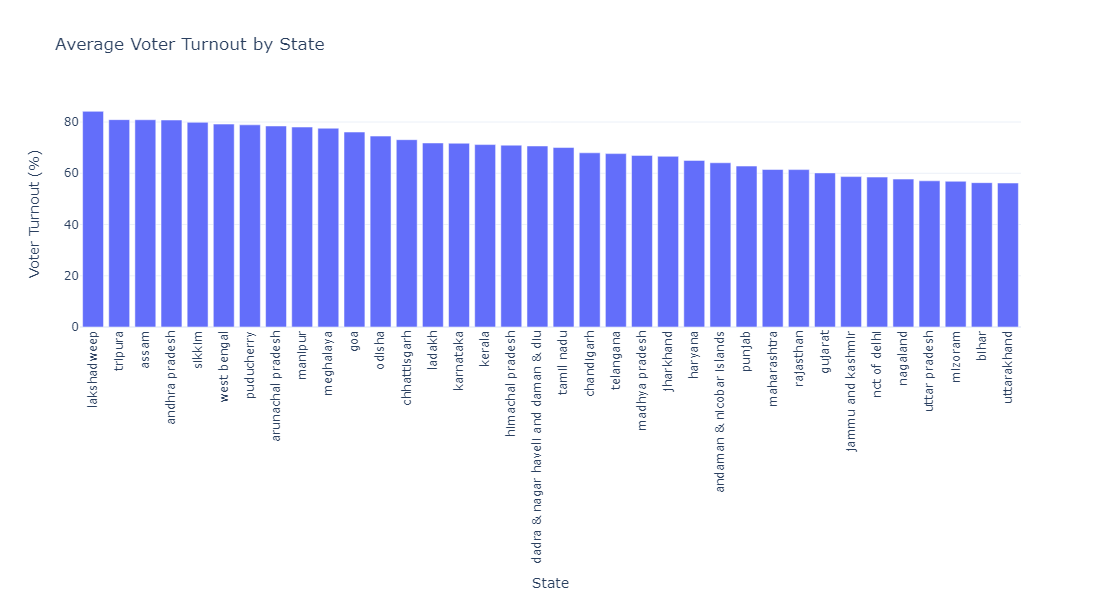

In [77]:
# Average Voter Turnout by State
fig = px.bar(state_voter_turnout, x='State', y='Polled (%)',
             labels={'State': 'State', 'Polled (%)': 'Voter Turnout (%)'},
             title='Average Voter Turnout by State')

fig.update_layout(xaxis={'categoryorder': 'total descending'},
                  xaxis_tickangle=-90,
                  width=800,
                  height=600)

fig.show()

# Analysis

This shows that Lakshadweep has the highest average voter turnout, followed closely by Tripura and Assam. Other states like Andhra Pradesh, Sikkim, West Bengal, and Manipur also show high voter engagement. On the other hand, states such as Bihar, Uttar Pradesh, and Uttarakhand have the lowest average voter turnout, which indicates significant regional variations in voter participation, with some smaller states and union territories showing higher engagement than larger states with higher ad spend.

In [67]:
advertiser_df['Amount spent (INR)'] = pd.to_numeric(advertiser_df['Amount spent (INR)'], errors='coerce')

In [68]:
# drop amount spent column
advertiser_df.dropna(subset=['Amount spent (INR)'], inplace=True)

In [69]:
party_ad_spend = advertiser_df.groupby('Page name')['Amount spent (INR)'].sum().sort_values(ascending=False)

In [70]:
top_5_parties = party_ad_spend.head(5).reset_index()

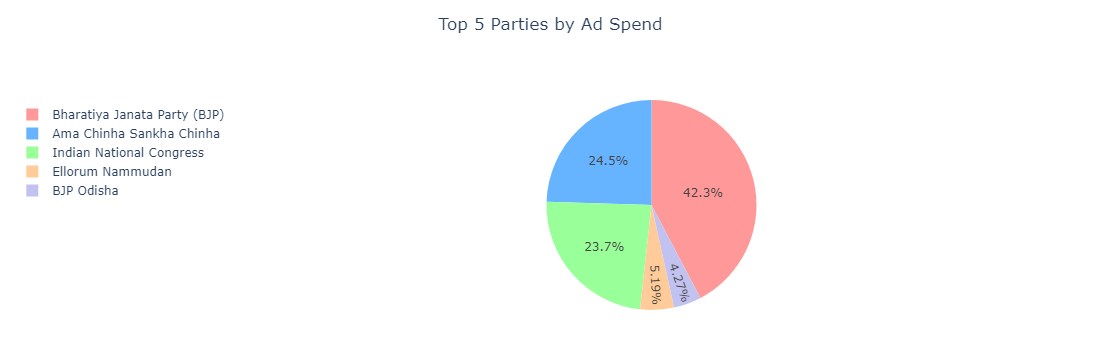

In [71]:
# top 5 parties by ad spend
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']
fig = px.pie(top_5_parties, values='Amount spent (INR)', names='Page name',
             title='Top 5 Parties by Ad Spend', color_discrete_sequence=colors,
             labels={'Page name': 'Political Party', 'Amount spent (INR)': 'Ad Spend (INR)'})

fig.update_traces(textinfo='percent')

fig.update_layout(
    showlegend=True,
    legend=dict(
        orientation="v",
        yanchor="top",
        y=1,
        xanchor="left",
        x=-0.3
    ),
    title=dict(
        y=0.95,
        x=0.5,
        xanchor='center',
        yanchor='top'
    ),
    margin=dict(l=200, r=50, t=100, b=50) 
)

fig.show()

# Analysis

This shows that the BJP spent most on election compings (42.3%), followed by Ama Chinha Sankha Chinha, Indian National Congress, Ellorum Nammudan and BJP Odisha.

In [72]:
# correlation between ad spend and voter turnout
correlation = merged_data[['Amount spent (INR)', 'Polled (%)']].corr()
print(correlation)

                    Amount spent (INR)  Polled (%)
Amount spent (INR)            1.000000   -0.010688
Polled (%)                   -0.010688    1.000000


The correlation matrix shows that the relationship between the amount spent (INR) and the percentage of votes polled (%) is very weak and slightly negative, which indicates that there is no linear relationship between ad spend and voter turnout. In other words, increasing the amount spent on advertising does not significantly affect the percentage of voter turnout.

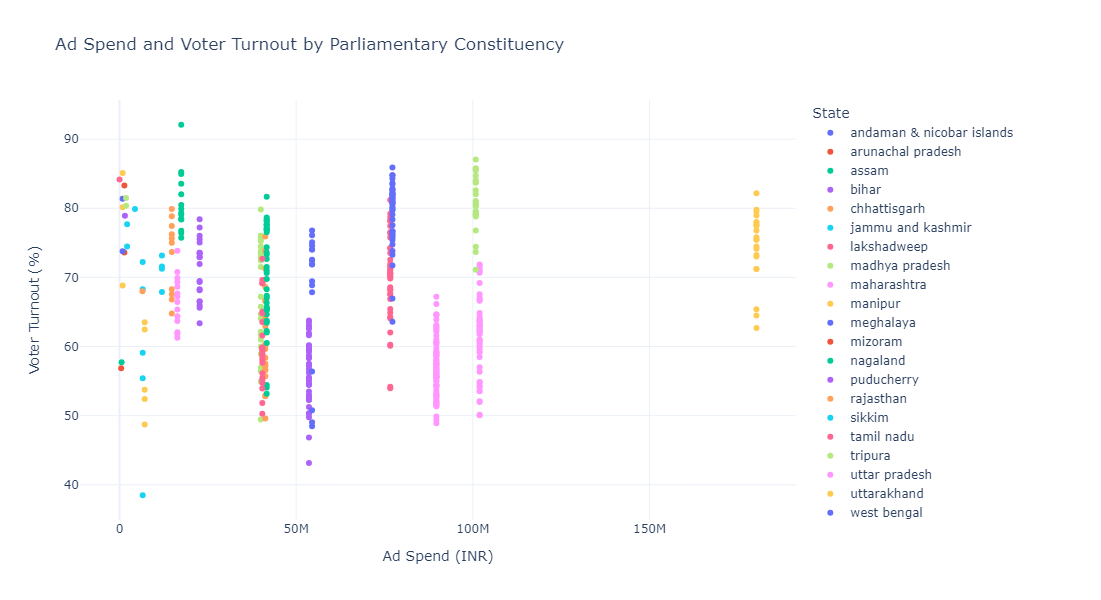

In [73]:
# relationship between ad spend and voter turnout by parliamentary constituency
merged_constituency_data = result_df.merge(
    location_df,
    left_on='State',
    right_on='Location name',
    how='left'
)
fig = px.scatter(merged_constituency_data, x='Amount spent (INR)', y='Polled (%)',
                 color='State',
                 labels={'Amount spent (INR)': 'Ad Spend (INR)', 'Polled (%)': 'Voter Turnout (%)'},
                 title='Ad Spend and Voter Turnout by Parliamentary Constituency')

fig.update_layout(width=800, height=600)

fig.show()

It shows that higher ad spending does not necessarily correlate with higher voter turnout. Other factors besides ad spend may play a significant role in influencing voter turnout.

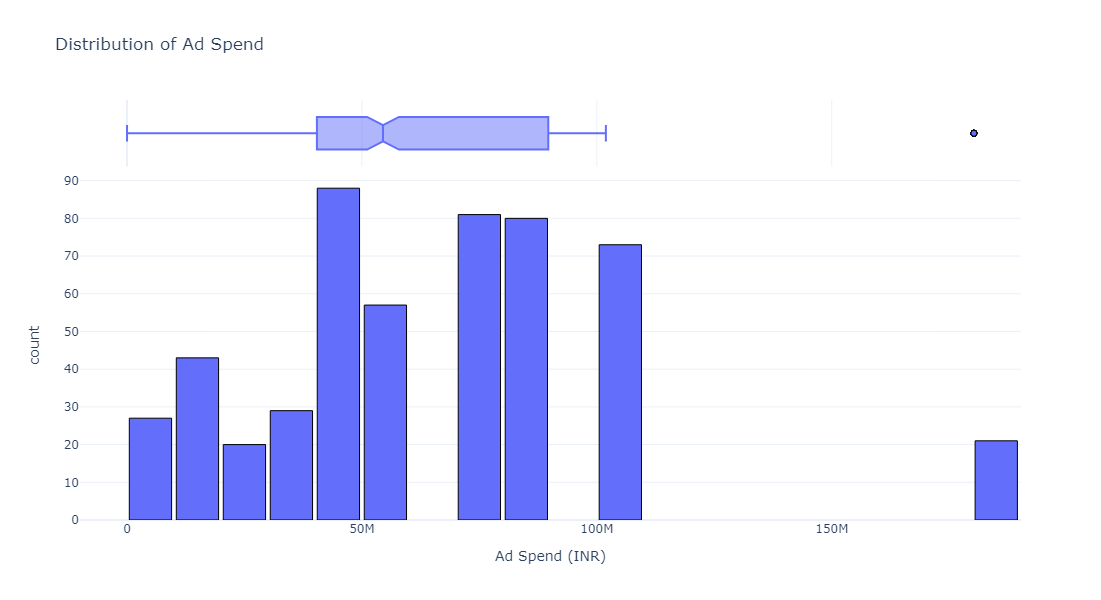

In [74]:
#distribution of ad spending
fig = px.histogram(merged_data, x='Amount spent (INR)', nbins=30, marginal='box',
                   labels={'Amount spent (INR)': 'Ad Spend (INR)'},
                   title='Distribution of Ad Spend')

fig.update_traces(marker=dict(line=dict(color='black', width=1)))
fig.update_layout(bargap=0.1, width=800, height=600)

fig.show()

This distribution suggests that while the majority of ad spends are concentrated within a certain range, there are notable exceptions with significantly higher expenditures.

In [75]:
phase_analysis = merged_data.groupby('Phase').agg({
    'Amount spent (INR)': 'sum',
    'Polled (%)': 'mean'
}).reset_index()

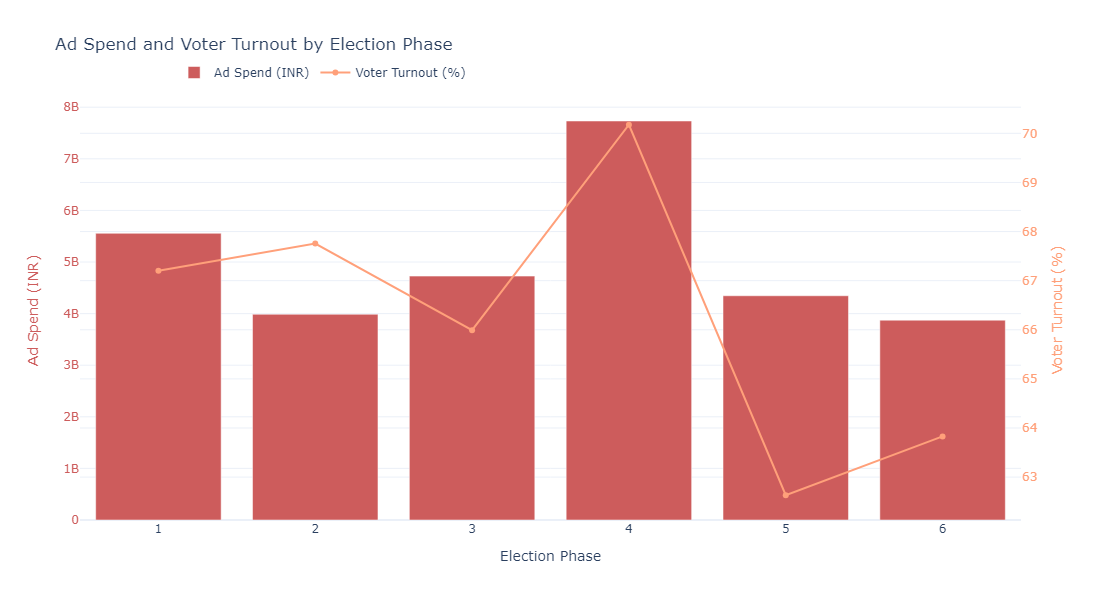

In [78]:
#relationship among Ad spend, Election phase and voter turnout 
fig = go.Figure()

fig.add_trace(go.Bar(
    x=phase_analysis['Phase'],
    y=phase_analysis['Amount spent (INR)'],
    name='Ad Spend (INR)',
    marker_color='indianred',
    yaxis='y1'
))

fig.add_trace(go.Scatter(
    x=phase_analysis['Phase'],
    y=phase_analysis['Polled (%)'],
    name='Voter Turnout (%)',
    marker_color='lightsalmon',
    yaxis='y2'
))

fig.update_layout(
    title='Ad Spend and Voter Turnout by Election Phase',
    xaxis=dict(title='Election Phase'),
    yaxis=dict(
        title='Ad Spend (INR)',
        titlefont=dict(color='indianred'),
        tickfont=dict(color='indianred')
    ),
    yaxis2=dict(
        title='Voter Turnout (%)',
        titlefont=dict(color='lightsalmon'),
        tickfont=dict(color='lightsalmon'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.1, y=1.1, orientation='h'),
    width=800,
    height=600
)

fig.show()

There is no consistent trend between ad spend and voter turnout. Election phases 1 and 4 have the highest ad spends, with phase 4 peaking in voter turnout at around 70%. However, phase 1, despite high ad spend, has a lower voter turnout of about 67%. Phases with moderate ad spend (e.g., 2 and 6) have lower voter turnout, while phase 5 has a notably low turnout despite moderate spending.

# Analysis Result

The analyses indicate that higher ad spend does not guarantee higher voter turnout, and voter engagement is influenced by various other factors. Larger and more significant states tend to spend more on ads, but this does not necessarily translate to higher voter participation. Political parties, particularly the BJP, invest heavily in advertising, yet the effectiveness of this spending in increasing voter turnout is questionable.